In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号


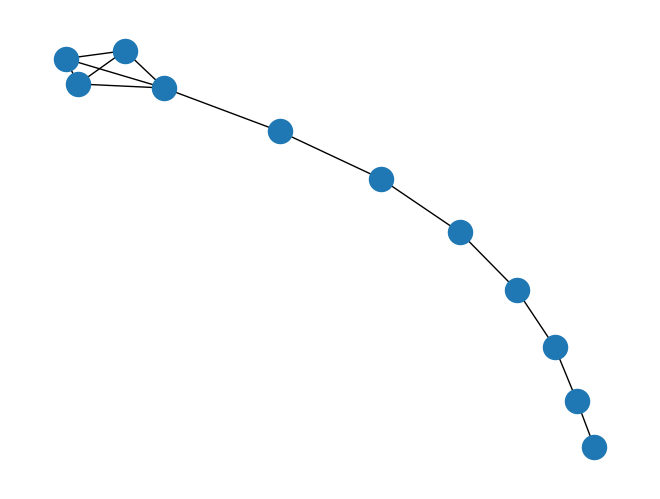

In [4]:
G = nx.lollipop_graph(4,7) # 4表示头的节点数，7表示尾部的节点数
pos = nx.spring_layout(G,seed=42)
nx.draw(G,pos)
plt.show()

### 图数据分析

In [5]:
nx.radius(G) # 半径

4

In [6]:
nx.diameter(G) # 直径

8

In [7]:
nx.eccentricity(G)# 偏心度：每个节点到图中其他节点的最远距离

{0: 8, 1: 8, 2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}

In [8]:
nx.center(G)# 中心节点

[6]

In [10]:
nx.periphery(G) # 外围节点

[0, 1, 2, 10]

In [11]:
nx.density(G)

0.23636363636363636

n为节点个数，m为连接个数
无向图
$$density=\frac{2m}{n(n-1)}$$
有向图
$$density=\frac{m}{n(n-1)}$$
无连接图的density为0，全连接图的density为1，Multigraph（多重连接图）和带self loop图的density可能大于1

### 3号节点到图中其他节点的最短距离

In [12]:
node_id = 3
nx.single_source_shortest_path_length(G,node_id)

{3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7}

### 每两个节点之间的最短距离

In [13]:
pathlengths = []
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    for p in spl:
        print('{} --> {} 最短距离 {}'.format(v, p, spl[p]))
        pathlengths.append(spl[p])

0 --> 0 最短距离 0
0 --> 1 最短距离 1
0 --> 2 最短距离 1
0 --> 3 最短距离 1
0 --> 4 最短距离 2
0 --> 5 最短距离 3
0 --> 6 最短距离 4
0 --> 7 最短距离 5
0 --> 8 最短距离 6
0 --> 9 最短距离 7
0 --> 10 最短距离 8
1 --> 1 最短距离 0
1 --> 0 最短距离 1
1 --> 2 最短距离 1
1 --> 3 最短距离 1
1 --> 4 最短距离 2
1 --> 5 最短距离 3
1 --> 6 最短距离 4
1 --> 7 最短距离 5
1 --> 8 最短距离 6
1 --> 9 最短距离 7
1 --> 10 最短距离 8
2 --> 2 最短距离 0
2 --> 0 最短距离 1
2 --> 1 最短距离 1
2 --> 3 最短距离 1
2 --> 4 最短距离 2
2 --> 5 最短距离 3
2 --> 6 最短距离 4
2 --> 7 最短距离 5
2 --> 8 最短距离 6
2 --> 9 最短距离 7
2 --> 10 最短距离 8
3 --> 3 最短距离 0
3 --> 0 最短距离 1
3 --> 1 最短距离 1
3 --> 2 最短距离 1
3 --> 4 最短距离 1
3 --> 5 最短距离 2
3 --> 6 最短距离 3
3 --> 7 最短距离 4
3 --> 8 最短距离 5
3 --> 9 最短距离 6
3 --> 10 最短距离 7
4 --> 4 最短距离 0
4 --> 3 最短距离 1
4 --> 5 最短距离 1
4 --> 0 最短距离 2
4 --> 1 最短距离 2
4 --> 2 最短距离 2
4 --> 6 最短距离 2
4 --> 7 最短距离 3
4 --> 8 最短距离 4
4 --> 9 最短距离 5
4 --> 10 最短距离 6
5 --> 5 最短距离 0
5 --> 4 最短距离 1
5 --> 6 最短距离 1
5 --> 3 最短距离 2
5 --> 7 最短距离 2
5 --> 0 最短距离 3
5 --> 1 最短距离 3
5 --> 2 最短距离 3
5 --> 8 最短距离 3
5 --> 9 最短距离 4
5 --> 10 最短距离 5
6 --

In [15]:
# 平均最短距离
print(sum(pathlengths) / len(pathlengths))

3.2231404958677685


In [16]:
# 不同距离的节点对个数
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1
print(dist)

{0: 11, 1: 26, 2: 18, 3: 16, 4: 14, 5: 12, 6: 10, 7: 8, 8: 6}
